In [ ]:
import pandas as pd

# Membaca dataset .data dan mengonversinya ke DataFrame
data_path = "parkinsons_updrs.data"
df = pd.read_csv(data_path)

# Menyimpan dataset sebagai CSV
df.to_csv("parkinsons_updrs.csv", index=False)


In [ ]:
data_path = "parkinsons_updrs.csv"
df = pd.read_csv(data_path)
df.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [19]:
df.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["motor_UPDRS", "total_UPDRS"])
y = df["motor_UPDRS"]  # Atau gunakan total_UPDRS sesuai kebutuhan

# Memastikan tidak ada missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Normalisasi fitur
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


subject#         0
age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64
0


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [24]:
# Dataset to Tensor
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))

# MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn):
        super(MLP, self).__init__()
        layers = []
        current_size = input_size
        
        # Adding hidden layers
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(current_size, hidden_size))
            layers.append(activation_fn())
            current_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(current_size, 1))  # Single regression output
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


In [25]:
def train_model(model, train_loader, optimizer, criterion, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")


In [26]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
    return total_loss / len(test_loader)


In [27]:
import itertools

# Define hyperparameter values
hidden_layers_list = [[4], [8], [16, 16], [32, 16, 8]]
activation_functions = [nn.ReLU, nn.Sigmoid, nn.Tanh]
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128, 256]
epochs_list = [1, 10, 25, 50, 100]


In [28]:
results = []

for hidden_layers, activation_fn, lr, batch_size, epochs in itertools.product(
    hidden_layers_list, activation_functions, learning_rates, batch_sizes, epochs_list
):
    print(f"Testing: Layers={hidden_layers}, Activation={activation_fn.__name__}, LR={lr}, Batch={batch_size}, Epochs={epochs}")
    
    # Update dataloader with new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Create model
    model = MLP(input_size=X_train.shape[1], hidden_layers=hidden_layers, activation_fn=activation_fn)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    # Train and Evaluate
    train_model(model, train_loader, optimizer, criterion, epochs)
    test_loss = evaluate_model(model, test_loader, criterion)
    
    # Save results
    results.append({
        "hidden_layers": hidden_layers,
        "activation_fn": activation_fn.__name__,
        "learning_rate": lr,
        "batch_size": batch_size,
        "epochs": epochs,
        "test_loss": test_loss,
    })


Testing: Layers=[4], Activation=ReLU, LR=1, Batch=16, Epochs=1
Epoch 1/1, Loss: 93.5549
Testing: Layers=[4], Activation=ReLU, LR=1, Batch=16, Epochs=10
Epoch 1/10, Loss: 97.6696
Epoch 2/10, Loss: 55.2839
Epoch 3/10, Loss: 65.0872
Epoch 4/10, Loss: 67.2770
Epoch 5/10, Loss: 82.7604
Epoch 6/10, Loss: 66.8431
Epoch 7/10, Loss: 66.4756
Epoch 8/10, Loss: 67.2743
Epoch 9/10, Loss: 67.1320
Epoch 10/10, Loss: 66.7688
Testing: Layers=[4], Activation=ReLU, LR=1, Batch=16, Epochs=25
Epoch 1/25, Loss: 79.7551
Epoch 2/25, Loss: 57.7595
Epoch 3/25, Loss: 63.6122
Epoch 4/25, Loss: 66.4022
Epoch 5/25, Loss: 67.3925
Epoch 6/25, Loss: 67.2171
Epoch 7/25, Loss: 67.8913
Epoch 8/25, Loss: 67.4445
Epoch 9/25, Loss: 67.5946
Epoch 10/25, Loss: 67.5252
Epoch 11/25, Loss: 67.7462
Epoch 12/25, Loss: 67.5982
Epoch 13/25, Loss: 67.4111
Epoch 14/25, Loss: 67.4990
Epoch 15/25, Loss: 67.7525
Epoch 16/25, Loss: 67.0523
Epoch 17/25, Loss: 68.1095
Epoch 18/25, Loss: 67.2815
Epoch 19/25, Loss: 68.0407
Epoch 20/25, Loss: 

In [29]:
results_df = pd.DataFrame(results)
results_df

,hidden_layers,activation_fn,learning_rate,batch_size,epochs,test_loss
0,[4],ReLU,1.0000,16,1,64.081816
1,[4],ReLU,1.0000,16,10,64.019427
2,[4],ReLU,1.0000,16,25,66.849953
3,[4],ReLU,1.0000,16,50,64.472611
4,[4],ReLU,1.0000,16,100,64.555852
...,...,...,...,...,...,...
1495,"[32, 16, 8]",Tanh,0.0001,256,1,509.425464
1496,"[32, 16, 8]",Tanh,0.0001,256,10,517.667438
1497,"[32, 16, 8]",Tanh,0.0001,256,25,483.544879
1498,"[32, 16, 8]",Tanh,0.0001,256,50,421.563123


In [30]:
from matplotlib import pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

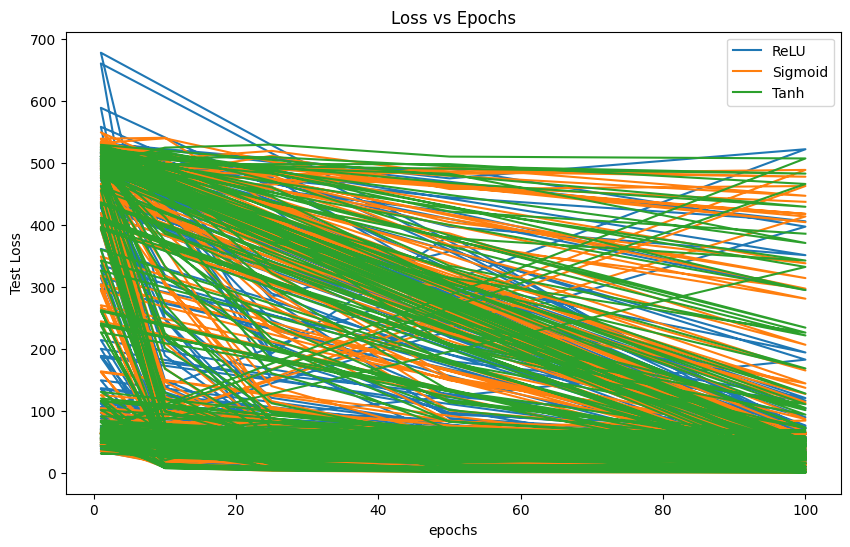

In [38]:
def plot_results(results_df, x_param, title, ylabel):
    plt.figure(figsize=(10, 6))
    for activation in results_df['activation_fn'].unique():
        subset = results_df[results_df['activation_fn'] == activation]
        plt.plot(subset[x_param], subset['test_loss'], label=activation)
    plt.title(title)
    plt.xlabel(x_param)
    plt.ylabel(ylabel)
    plt.legend()
    plt.savefig(f"{title}.png")
    plt.show()

# Generate PDF Report
def generate_pdf_report(results_df, file_name="report.pdf"):
    c = canvas.Canvas(file_name, pagesize=letter)
    c.setFont("Helvetica", 12)
    c.drawString(50, 750, "Experiment Results")
    c.drawString(50, 730, f"Total experiments: {len(results_df)}")
    c.drawString(50, 710, f"Best configuration: {results_df.loc[results_df['test_loss'].idxmin()].to_dict()}")
    
    # Periksa apakah file Loss vs Epochs.png tersedia
    image_path = "Loss vs Epochs.png"
    try:
        c.drawImage(image_path, 50, 450, width=500, height=250)
    except Exception as e:
        print(f"Failed to load image {image_path}: {e}")
        
    c.save()

# Create Plots and PDF
plot_results(results_df, x_param='epochs', title='Loss vs Epochs', ylabel='Test Loss')
generate_pdf_report(results_df)

In [73]:
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn):
        super(MLPRegression, self).__init__()
        layers = []
        current_size = input_size
        
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(current_size, hidden_size))
            layers.append(activation_fn())
            current_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(current_size, 1))  # Regression has 1 output
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


In [74]:
def train_regression_model(model, train_loader, optimizer, criterion, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")


In [75]:
def evaluate_regression_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
    return total_loss / len(test_loader)


In [77]:
import numpy as np

def train_regression(model, train_loader, optimizer, criterion, epochs):
    model.train()
    history = []  # Simpan loss setiap epoch
    for epoch in range(epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        history.append(avg_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")
    return history

def evaluate_regression(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    predictions, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            predictions.extend(y_pred.tolist())
            actuals.extend(y_batch.tolist())
    mse = total_loss / len(test_loader)
    return mse, predictions, actuals

# Training and evaluating the regression model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

history = train_regression(model, train_loader, optimizer, criterion, epochs=50)
mse, predictions, actuals = evaluate_regression(model, test_loader, criterion)

print(f"Final Test MSE: {mse:.4f}")


Epoch 1/50, Loss: 0.0877
Epoch 2/50, Loss: 0.0878
Epoch 3/50, Loss: 0.0875
Epoch 4/50, Loss: 0.0876
Epoch 5/50, Loss: 0.0873
Epoch 6/50, Loss: 0.0871
Epoch 7/50, Loss: 0.0869
Epoch 8/50, Loss: 0.0868
Epoch 9/50, Loss: 0.0865
Epoch 10/50, Loss: 0.0864
Epoch 11/50, Loss: 0.0870
Epoch 12/50, Loss: 0.0864
Epoch 13/50, Loss: 0.0871
Epoch 14/50, Loss: 0.0861
Epoch 15/50, Loss: 0.0859
Epoch 16/50, Loss: 0.0863
Epoch 17/50, Loss: 0.0861
Epoch 18/50, Loss: 0.0860
Epoch 19/50, Loss: 0.0855
Epoch 20/50, Loss: 0.0858
Epoch 21/50, Loss: 0.0854
Epoch 22/50, Loss: 0.0853
Epoch 23/50, Loss: 0.0852
Epoch 24/50, Loss: 0.0853
Epoch 25/50, Loss: 0.0849
Epoch 26/50, Loss: 0.0847
Epoch 27/50, Loss: 0.0851
Epoch 28/50, Loss: 0.0848
Epoch 29/50, Loss: 0.0848
Epoch 30/50, Loss: 0.0843
Epoch 31/50, Loss: 0.0847
Epoch 32/50, Loss: 0.0846
Epoch 33/50, Loss: 0.0843
Epoch 34/50, Loss: 0.0847
Epoch 35/50, Loss: 0.0842
Epoch 36/50, Loss: 0.0843
Epoch 37/50, Loss: 0.0844
Epoch 38/50, Loss: 0.0842
Epoch 39/50, Loss: 0.

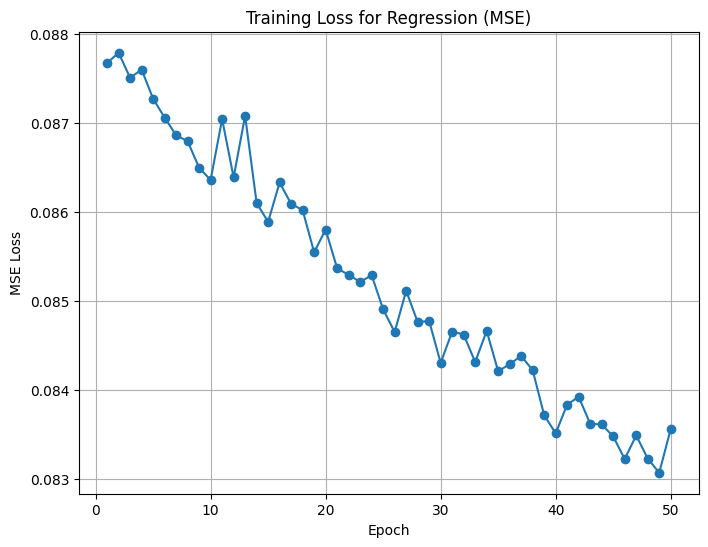

In [78]:
# Plotting Loss over Epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(history) + 1), history, marker='o')
plt.title("Training Loss for Regression (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid()
plt.show()


In [87]:
# Update Dataset with Correct Target Data Type
train_dataset_class = TensorDataset(
    torch.tensor(X_train, dtype=torch.float32), 
    y_train_class.to(torch.long)  # Ensure target is of type long
)

test_dataset_class = TensorDataset(
    torch.tensor(X_test, dtype=torch.float32), 
    y_test_class.to(torch.long)  # Ensure target is of type long
)

train_loader_class = DataLoader(train_dataset_class, batch_size=32, shuffle=True)
test_loader_class = DataLoader(test_dataset_class, batch_size=32, shuffle=False)


C:\Users\ccoos\AppData\Local\Temp\ipykernel_23860\699938994.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X_train, dtype=torch.float32),
C:\Users\ccoos\AppData\Local\Temp\ipykernel_23860\699938994.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X_test, dtype=torch.float32),


In [88]:
def train_classification(model, train_loader, optimizer, criterion, epochs):
    model.train()
    history = []
    for epoch in range(epochs):
        epoch_loss, correct, total = 0, 0, 0
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        avg_loss = epoch_loss / len(train_loader)
        accuracy = correct / total
        history.append((avg_loss, accuracy))
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    return history

def evaluate_classification(model, test_loader, criterion):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
    accuracy = correct / total
    avg_loss = total_loss / len(test_loader)
    return avg_loss, accuracy

# Update Model for Classification (use LogSoftmax for outputs)
model_class = MLP(input_size=X_train.shape[1], hidden_layers=[32, 16], activation_fn=nn.ReLU)
model_class.network[-1] = nn.Linear(16, 2)  # Update output layer for binary classification

optimizer = optim.Adam(model_class.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

history_class = train_classification(model_class, train_loader_class, optimizer, criterion, epochs=50)
test_loss_class, test_accuracy = evaluate_classification(model_class, test_loader_class, criterion)

print(f"Final Test Loss: {test_loss_class:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50, Loss: 0.6938, Accuracy: 0.5070
Epoch 2/50, Loss: 0.6926, Accuracy: 0.5250
Epoch 3/50, Loss: 0.6923, Accuracy: 0.5430
Epoch 4/50, Loss: 0.6918, Accuracy: 0.5280
Epoch 5/50, Loss: 0.6914, Accuracy: 0.5140
Epoch 6/50, Loss: 0.6916, Accuracy: 0.5320
Epoch 7/50, Loss: 0.6913, Accuracy: 0.5410
Epoch 8/50, Loss: 0.6906, Accuracy: 0.5500
Epoch 9/50, Loss: 0.6910, Accuracy: 0.5360
Epoch 10/50, Loss: 0.6920, Accuracy: 0.5260
Epoch 11/50, Loss: 0.6900, Accuracy: 0.5380
Epoch 12/50, Loss: 0.6897, Accuracy: 0.5530
Epoch 13/50, Loss: 0.6892, Accuracy: 0.5590
Epoch 14/50, Loss: 0.6889, Accuracy: 0.5470
Epoch 15/50, Loss: 0.6876, Accuracy: 0.5490
Epoch 16/50, Loss: 0.6873, Accuracy: 0.5600
Epoch 17/50, Loss: 0.6863, Accuracy: 0.5570
Epoch 18/50, Loss: 0.6856, Accuracy: 0.5570
Epoch 19/50, Loss: 0.6844, Accuracy: 0.5570
Epoch 20/50, Loss: 0.6821, Accuracy: 0.5790
Epoch 21/50, Loss: 0.6825, Accuracy: 0.5600
Epoch 22/50, Loss: 0.6834, Accuracy: 0.5440
Epoch 23/50, Loss: 0.6783, Accuracy: 0.58

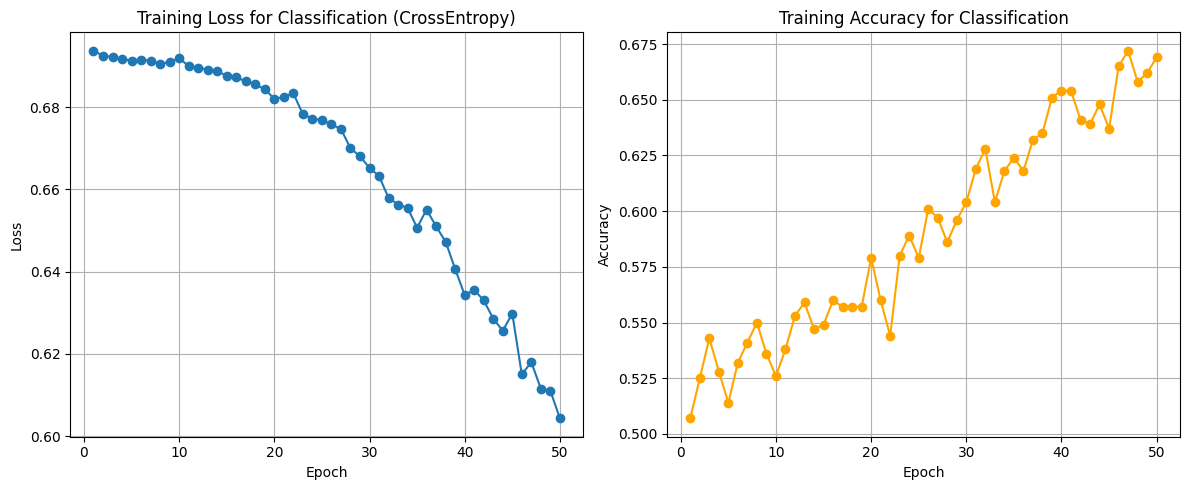

In [89]:
# Plotting Loss and Accuracy over Epochs
loss_history, acc_history = zip(*history_class)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
plt.title("Training Loss for Classification (CrossEntropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(acc_history) + 1), acc_history, marker='o', color='orange')
plt.title("Training Accuracy for Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()

plt.tight_layout()
plt.show()


In [90]:
def plot_results(results_df, x_param, title, ylabel):
    plt.figure(figsize=(10, 6))
    for activation in results_df['activation_fn'].unique():
        subset = results_df[results_df['activation_fn'] == activation]
        plt.plot(subset[x_param], subset['test_loss'], label=activation)
    plt.title(title)
    plt.xlabel(x_param)
    plt.ylabel(ylabel)
    plt.legend()
    plt.savefig(f"{title}.png")  # Save the plot as a PNG file
    plt.show()


In [91]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def generate_pdf_report(results_df, file_name="report.pdf"):
    c = canvas.Canvas(file_name, pagesize=letter)
    c.setFont("Helvetica", 12)
    c.drawString(50, 750, "Experiment Results")
    c.drawString(50, 730, f"Total experiments: {len(results_df)}")
    
    best_configuration = results_df.loc[results_df['test_loss'].idxmin()]
    c.drawString(50, 710, f"Best configuration: {best_configuration.to_dict()}")
    
    # Load and add the plot image
    image_path = "Loss vs Epochs.png"
    try:
        c.drawImage(image_path, 50, 450, width=500, height=250)
    except Exception as e:
        print(f"Failed to load image {image_path}: {e}")
        
    c.save()


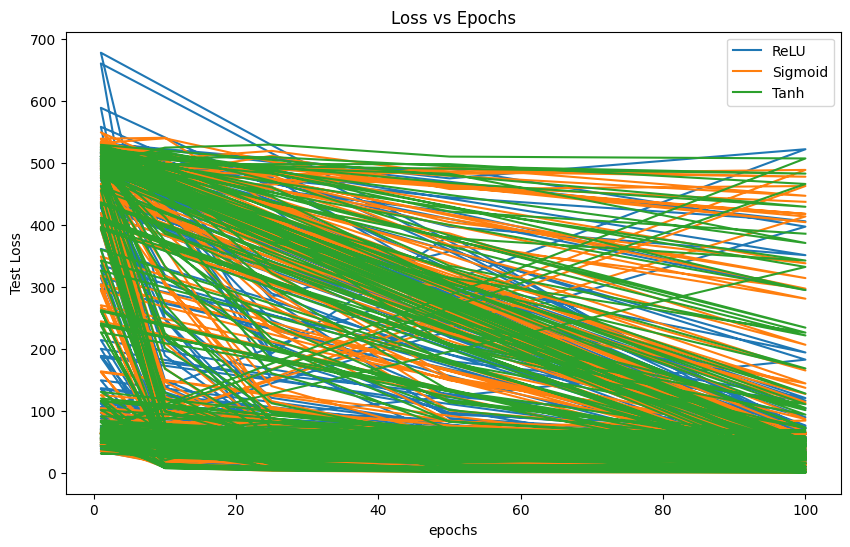

In [92]:
plot_results(results_df, x_param='epochs', title='Loss vs Epochs', ylabel='Test Loss')

# Generate PDF report
generate_pdf_report(results_df)
